In [11]:
import numpy as np
import os
from os import listdir
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from tqdm import tqdm
import random
import pickle

In [12]:
DATADIR = r"C:\Users\sulut\OneDrive\Documents\Data\braintumour"
ogAddy = os.listdir(DATADIR)

testDir= r'C:\Users\sulut\OneDrive\Documents\Data\braintumour\TEST'

trainDir= r'C:\Users\sulut\OneDrive\Documents\Data\braintumour\TRAIN'

splits = ['TRAIN','TEST']

categories = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


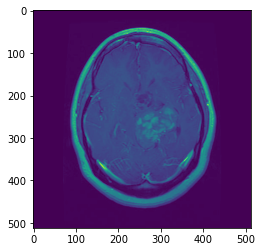

In [13]:
for split in splits:
    path = os.path.join(DATADIR,split)
    for category in categories:
        path = os.path.join(path,category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array)
            plt.show()
            break
        break
    break

In [14]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
print(img_array.shape)

(512, 512)


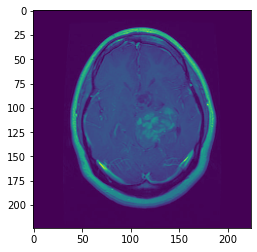

In [16]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [17]:
path = ''

training_data = []
training_labels = []

def create_training_data():
    
    for category in categories:  # do dogs and cats

        path = os.path.join(trainDir,category)  # create path to dogs and cats
        class_num = category.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                name = os.path.basename(path)
                if name == 'glioma_tumor':
                    class_num = 0
                    
                elif name == 'meningioma_tumor':
                    class_num = 1
                
                elif name == 'no_tumor':
                    class_num = 2
                    
                elif name == 'pituitary_tumor':
                    class_num = 3

                else: class_num = 4
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append(new_array)
                training_labels.append(class_num)# add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()
print(len(training_data))
print(len(training_labels))

100%|██████████| 827/827 [00:02<00:00, 355.58it/s]

2870
2870


In [18]:
def add_test_data():
        for category in categories:  # do dogs and cats

            path = os.path.join(testDir,category)  # create path to dogs and cats
            class_num = category.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

            for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
                try:
                    name = os.path.basename(path)
                    if name == 'glioma_tumor':
                        class_num = 0

                    elif name == 'meningioma_tumor':
                        class_num = 1

                    elif name == 'no_tumor':
                        class_num = 2

                    elif name == 'pituitary_tumor':
                        class_num = 3

                    else: class_num = 4
                    img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)  # convert to array
                    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                    training_data.append(new_array)
                    training_labels.append(class_num)  # add this to our training_data
                except Exception as e:  # in the interest in keeping the output clean...
                    pass
                #except OSError as e:
                #    print("OSErrroBad img most likely", e, os.path.join(path,img))
                #except Exception as e:
                #    print("general exception", e, os.path.join(path,img))

add_test_data()
print(len(training_data))
print(len(training_labels))

100%|██████████| 74/74 [00:00<00:00, 215.69it/s]

3264
3264


In [19]:
c = list(zip(training_data, training_labels))

random.shuffle(c)

training_data , training_labels = zip(*c)

In [20]:
pickle_out = open("braintumordata.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

pickle_out = open("braintumorlabels.pickle","wb")
pickle.dump(training_labels, pickle_out)
pickle_out.close()
